<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

100%|██████████| 251k/251k [00:00<00:00, 59.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adityakadiwal/water-potability/versions/3


In [3]:
df = pd.DataFrame(pd.read_csv(path + "/water_potability.csv"))

## Dataset Statistics

In [4]:
print(df.describe())



                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


## Missing Values

In [5]:
Missing_Values = df.isna().sum()
missing_percent = (Missing_Values / len(df)) * 100
print("MISSING VALUES PER FEATURE \n")
print(Missing_Values)
print("\n ==================================================================================")
print("\n MISSING VALUES PERCENTAGE PER FEATURE \n")
print(missing_percent)

MISSING VALUES PER FEATURE 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


 MISSING VALUES PERCENTAGE PER FEATURE 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


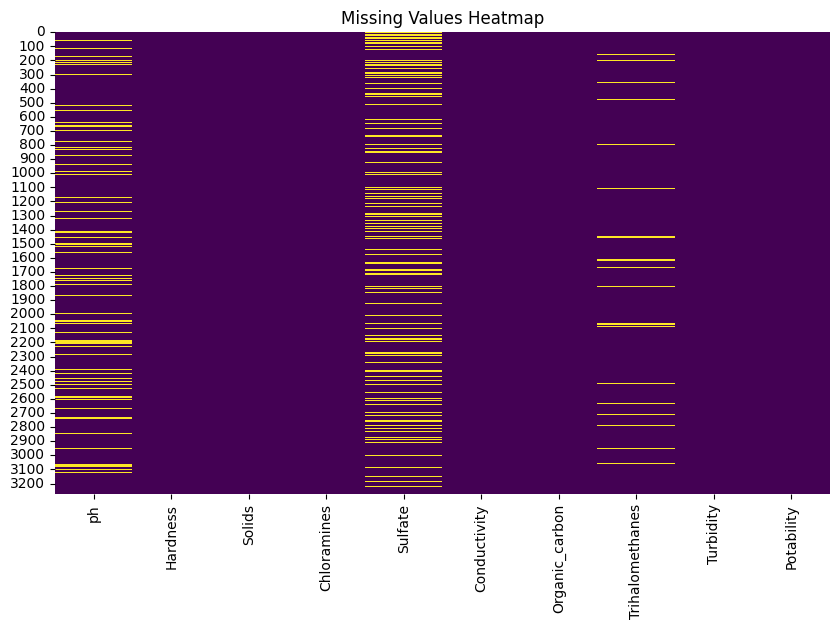

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


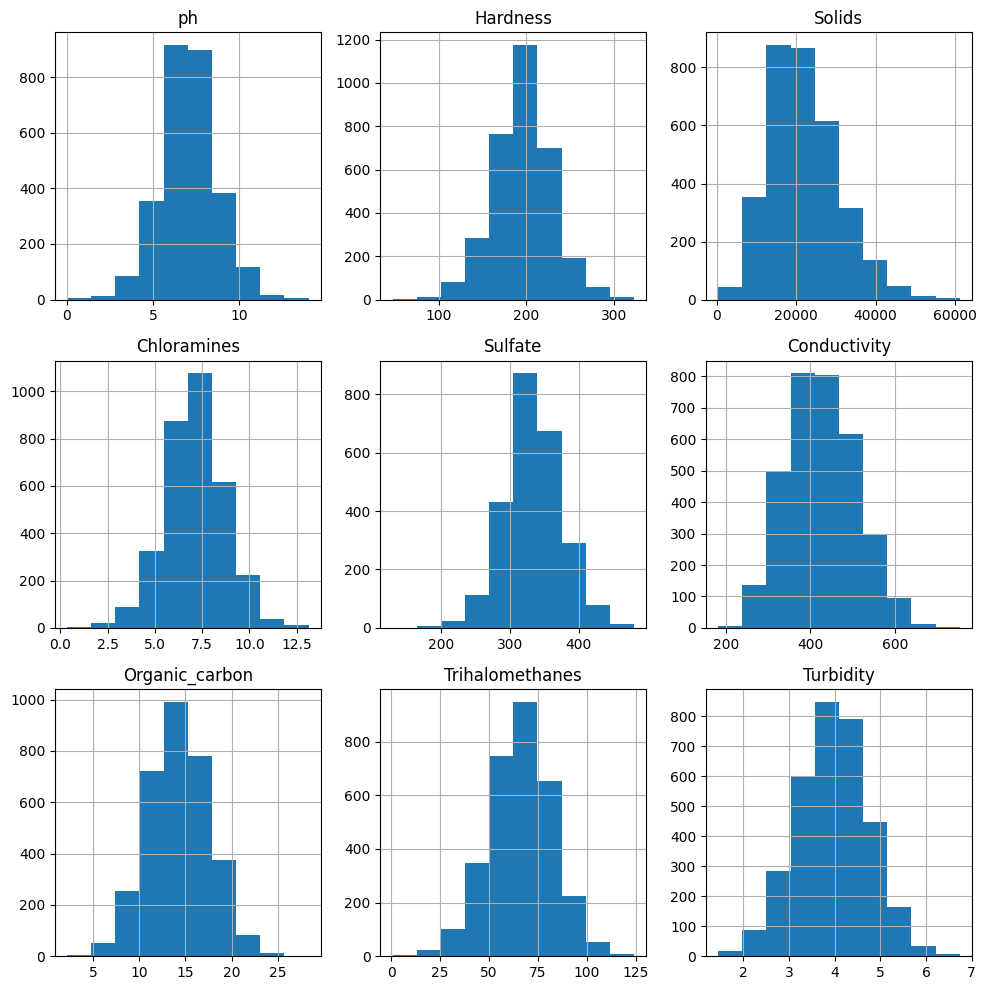

In [7]:
Features = df.drop(['Potability'], axis=1)
Target = df['Potability']

Features.hist(figsize = (10,10))
plt.tight_layout()
plt.show()


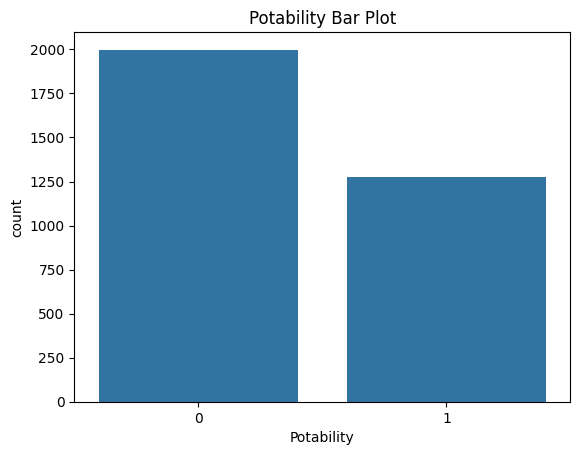

Number of Potables:  1278
Number of Non-Potables:  1998


In [8]:
sns.countplot(x='Potability', data=df)
plt.title("Potability Bar Plot")
plt.show()

Potables = df[df['Potability'] == 1]
Non_Potables = df[df['Potability'] == 0]

NumOfPotables = len(Potables)
NumOfNonPotables = len(Non_Potables)

print("Number of Potables: ", NumOfPotables)
print("Number of Non-Potables: ", NumOfNonPotables)

In [9]:
df1 = df[df['ph'] < 6.5]
df2 = df[df['ph'] > 8.5]
df3 = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]

# df1 = df1.groupby('Potability').count()['ph']
# df2.groupby('Potability').count()['ph']
# print(df3.groupby('Potability').count())['ph']

counts1 = df1['Potability'].value_counts()
percentage1 = counts1.get(1)/ counts1.sum() * 100

counts2 = df2['Potability'].value_counts()
percentage2 = counts2.get(1)/ counts2.sum() * 100

counts3 = df3['Potability'].value_counts()
percentage3 = counts3.get(1)/ counts3.sum() * 100

print(f"For ph < 6.5: {percentage1:.2f}% potable")
print(f"For ph > 8.5: {percentage2:.2f}% potable")
print(f"For 6.5 ≤ ph ≤ 8.5: {percentage3:.2f}% potable")





For ph < 6.5: 36.78% potable
For ph > 8.5: 33.13% potable
For 6.5 ≤ ph ≤ 8.5: 43.90% potable


In [10]:
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<Axes: xlabel='ph', ylabel='Chloramines'>

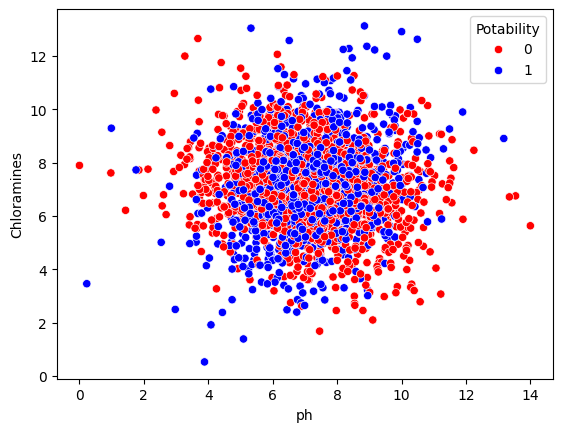

In [11]:
# plt.scatter(df['ph'], df['Chloramines'])
# plt.xlabel('ph')
# plt.ylabel('Chloramines')
# plt.show()

sns.scatterplot(data=df, x='ph',y='Chloramines',hue='Potability',palette={1:'blue', 0:'red'})

## Fill Missing Values

In [12]:
df = df.fillna(df.mean())
print(df)

Missing_Values = df.isna().sum()
missing_percent = (Missing_Values / len(df)) * 100
print("MISSING VALUES PER FEATURE \n")
print(Missing_Values)
print("\n ==================================================================================")
print("\n MISSING VALUES PERCENTAGE PER FEATURE \n")
print(missing_percent)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = Features.to_numpy()
y = Target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print(f"With 70-30 split, we get {X_train.shape[0]} train samples and {X_test.shape[0]} samples")

With 70-30 split, we get 2293 train samples and 983 samples


# Decision Tree

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_hat_train)
test_acc = accuracy_score(y_test, y_hat_test)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 0.9982555604012211
Test Accuracy: 0.5737538148524923


## Grid Search

In [15]:
import itertools

criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]

results = []

for crit, depth, split, leaf, feat, alpha in itertools.product(
    criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas
):
    clf = tree.DecisionTreeClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        random_state=0
    )
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    results.append({
        'criterion': crit,
        'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf,
        'max_features': feat,
        'ccp_alpha': alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print(results_df)


results_df = results_df.sort_values(by='test_acc', ascending=False).reset_index(drop=True)

test_accuracies = results_df['test_acc'].values
max_test_acc = np.max(test_accuracies)

print(f"\nMax test accuracy is: {max_test_acc} and it is achieved for: \n")

best_parameters_df = results_df.iloc[[0]]
print(best_parameters_df)



   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    ccp_alpha  train_acc  test_acc  
0        0.00   0.996075  0.589013  
1

## 8. Find best parameters with fixed maximum depth

In [16]:
results_df2 = results_df[results_df['max_depth'] == 3].reset_index(drop=True)
print(results_df2)

test_accuracies2 = results_df2['test_acc'].values
max_test_acc2 = np.max(test_accuracies2)

print(f"\nMax test accuracy is: {max_test_acc2} and it is achieved for: \n")

best_parameters_df2 = results_df2.iloc[[0]]
print(best_parameters_df2)



   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0    entropy        3.0                  2                 1         None   
1    entropy        3.0                  2                 2         None   
2    entropy        3.0                  5                 2         None   
3    entropy        3.0                  5                 1         None   
4       gini        3.0                  5                 1         sqrt   
5       gini        3.0                  5                 2         sqrt   
6       gini        3.0                  2                 2         sqrt   
7       gini        3.0                  2                 1         sqrt   
8    entropy        3.0                  5                 1         sqrt   
9    entropy        3.0                  5                 2         sqrt   
10   entropy        3.0                  2                 2         sqrt   
11   entropy        3.0                  2                 1         sqrt   

## Train the model with the selected parameters

[Text(0.5, 0.875, 'x[4] <= 259.026\nentropy = 0.968\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.25, 0.625, 'x[2] <= 21161.408\nentropy = 0.771\nsamples = 62\nvalue = [14, 48]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 6.674\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.0625, 0.125, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.375, 0.375, 'x[1] <= 220.901\nentropy = 0.365\nsamples = 43\nvalue = [3, 40]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.4375, 0.125, 'entropy = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.75, 0.625, 'x[4] <= 387.328\nentropy = 0.961\nsamples = 2231\nvalue = [1374, 857]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 4.636\nentropy = 0.952\nsamples = 2068\nvalue = [1300, 768]'),
 Text(0.5625, 0.125, 'entropy = 0.71\nsamples = 98\nvalue = [79, 19]'),
 Text(0.6875, 0.125, 'entropy = 0.958\nsamp

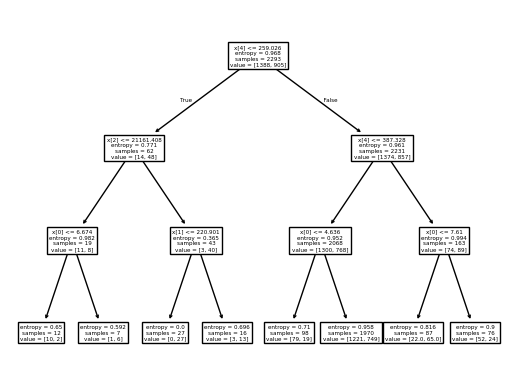

In [17]:
crit = best_parameters_df2['criterion'].values[0]
depth = int(best_parameters_df2['max_depth'].values[0])
split = best_parameters_df2['min_samples_split'].values[0]
leaf = best_parameters_df2['min_samples_leaf'].values[0]
feat = best_parameters_df2['max_features'].values[0]
alpha = best_parameters_df2['ccp_alpha'].values[0]

clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, max_features=feat, ccp_alpha=alpha, random_state=0)

clf.fit(X_train, y_train)

tree.plot_tree(clf)

## Feature Importance of the best model

[0.23522043 0.10394122 0.06036215 0.18436505 0.33464589 0.04387712
 0.         0.02795831 0.00962984]
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')


/tmp/ipython-input-1815272825.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


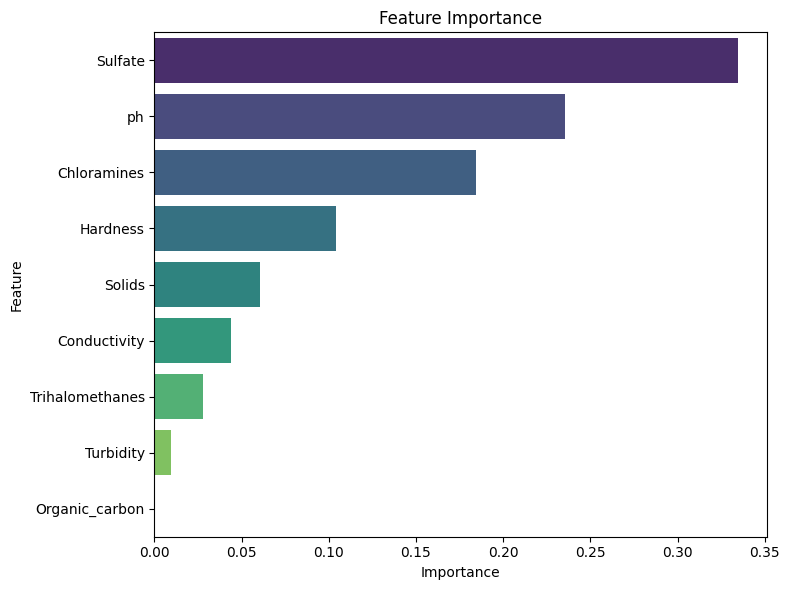

           Feature  Importance
4          Sulfate    0.334646
0               ph    0.235220
3      Chloramines    0.184365
1         Hardness    0.103941
2           Solids    0.060362
5     Conductivity    0.043877
7  Trihalomethanes    0.027958
8        Turbidity    0.009630
6   Organic_carbon    0.000000


In [28]:
crit = best_parameters_df['criterion'].values[0]
depth = int(best_parameters_df['max_depth'].values[0])
split = best_parameters_df['min_samples_split'].values[0]
leaf = best_parameters_df['min_samples_leaf'].values[0]
feat = best_parameters_df['max_features'].values[0]
alpha = best_parameters_df['ccp_alpha'].values[0]

clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, max_features=feat, ccp_alpha=alpha, random_state=0)

clf.fit(X_train, y_train)


importances = clf.feature_importances_
print(importances)
feature_names = Features.columns
print(feature_names)

# feature_names = X.columns

# Create a dataframe for visualization
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display numeric values
print(feat_imp)


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [50, 100, 200]
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]

results_forest = []

for n_est, crit, depth, split, leaf, feat, alpha in itertools.product(n_estimators, criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas):
    clf = RandomForestClassifier(
        n_estimators=n_est,
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        random_state=0
    )
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    results_forest.append({
        'n_estimators': n_est,
        'criterion': crit,
        'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf,
        'max_features': feat,
        'ccp_alpha': alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

# Convert to DataFrame
results_forest_df = pd.DataFrame(results_forest)

print(results_forest_df)


results_forest_df = results_forest_df.sort_values(by='test_acc', ascending=False).reset_index(drop=True)

test_accuracies = results_forest_df['test_acc'].values
max_test_acc = np.max(test_accuracies)

print(f"\nMax test accuracy is: {max_test_acc} and it is achieved for: \n")

forest_best_parameters_df = results_forest_df.iloc[[0]]
print(forest_best_parameters_df)

     n_estimators criterion  max_depth  min_samples_split  min_samples_leaf  \
0              50      gini        NaN                  2                 1   
1              50      gini        NaN                  2                 1   
2              50      gini        NaN                  2                 1   
3              50      gini        NaN                  2                 1   
4              50      gini        NaN                  2                 2   
..            ...       ...        ...                ...               ...   
283           200   entropy        5.0                  5                 1   
284           200   entropy        5.0                  5                 2   
285           200   entropy        5.0                  5                 2   
286           200   entropy        5.0                  5                 2   
287           200   entropy        5.0                  5                 2   

    max_features  ccp_alpha  train_acc  test_acc  
